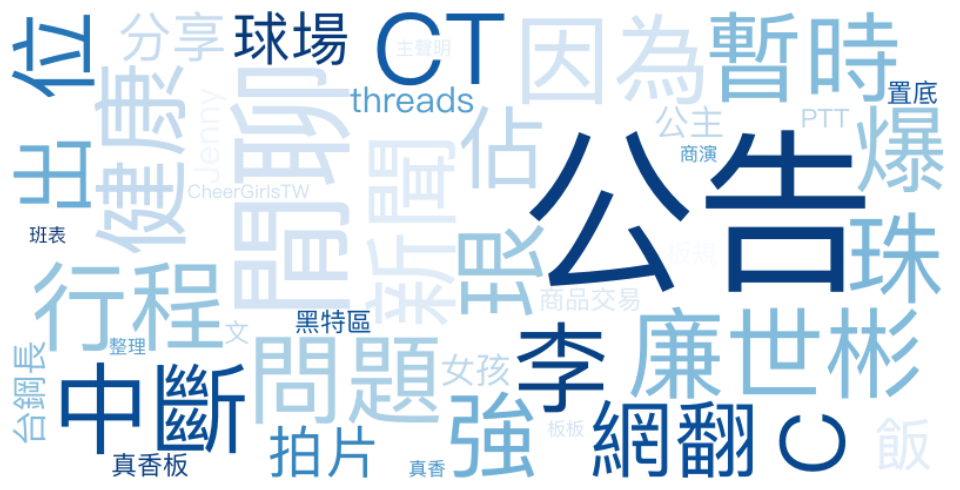

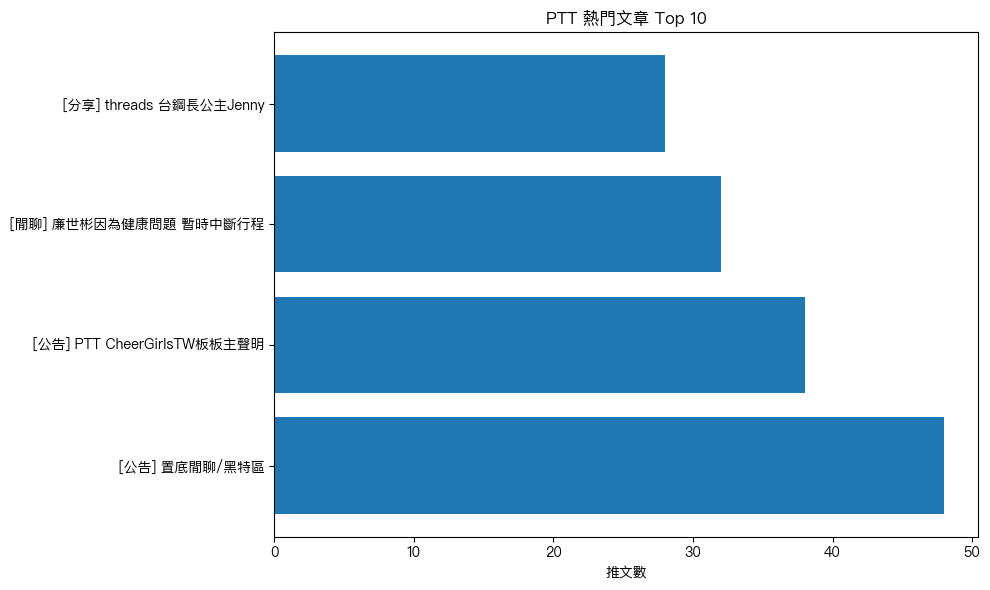

In [54]:
# 載入必要的套件
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
import jieba
from collections import Counter
import os

# 中文字型路徑（放在 data/ 資料夾）
font_path = 'data/PingFang.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 確保資料夾存在
os.makedirs("data", exist_ok=True)

# 讀取 CSV 檔案
df = pd.read_csv('data/cheergirls_articles_3pages.csv')

# 定義產生詞雲圖的函數（會儲存成圖檔）
def generate_wordcloud(text, output_path):
    font_path = 'data/PingFang.ttc'  # 字型檔路徑（確保有下載字型）

    wordcloud = WordCloud(
        font_path=font_path,
        width=800, height=400,
        background_color='white',
        colormap='Blues'
    ).generate(text)

    # 顯示詞雲圖
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_path)  # 儲存圖片
    plt.show()

# jieba 斷詞：將所有標題切詞並合併成一段文字
text = " ".join(df['標題'].dropna().apply(lambda x: " ".join(jieba.cut(str(x)))))

# 產生並儲存詞雲圖
generate_wordcloud(text, "data/wordcloud.png")

# 將推文數轉成數字（有些可能是空白或特殊符號）
df['推文'] = pd.to_numeric(df['推文'], errors='coerce')

# 篩出推文數最多的前 10 篇文章
top_push = df.sort_values(by='推文', ascending=False).head(10)

# 畫推文最多的文章長條圖
plt.figure(figsize=(10,6))
plt.barh(top_push["標題"], pd.to_numeric(top_push["推文"], errors="coerce"))
plt.xlabel("推文數")
plt.title("PTT 熱門文章 Top 10")
plt.tight_layout()
plt.savefig("data/top_push.png")
plt.show()